In [183]:
# Projeto 1 - Ciência dos Dados

Nome: Rodrigo Sennati Mattar

## Pergunta (s) a ser respondida

Pergunta1: 
Os países membros do Mercosul tiveram um crescimento maior de seu IDH quando comparados a não membros?

Pergunta2:
Os países membros do Mercosul tiveram um crescimento maior de sua balança comercial quando comparados a não membros?

Pergunta 3
Os países membros do Mercosul tiveram um crescimento maior em seu PIB per capita quando comparados a não membros?

## Explicação da hipótese e mecanismo

Contexto:
O Mercousul é uma organização internacional criada em 1991, para adoção de políticas de integração econômica e aduaneira entre esses países.
    
Mecanismo:

Hipótese 1:
Os países membros do Mercosul não tendem a tem um acréscimo em seu IDH pois mesmo que essa organização estimule relações comerciais entre os países, isso nao influencia diretamente o IDH.

Hipótese2:
Os países membros do mercosul tendem a aumentar sua balança comercial pelo estímulo promovido pela aliançca aduaneira.

Hipótese 3:
Os países membros do Mercosul tendem a aumentar seu PIB per capita quando comparados a países nao membros do Mercousl da América do Sul, pois as exportações e importações fazem parte do PIB, e o Mercosul estimula o comércio. 


link artigo mercosul: https://www.guiadacarreira.com.br/educacao/mercosul-relacoes-internacionais/

## Bases de dados usadas

https://docs.google.com/spreadsheets/d/178j02780CUiRqZOmc6Eybg9YwEH4LRddQ68afSZo4ak/pub
https://docs.google.com/spreadsheets/d/1WIrCmPzIg5UAQl3WxPITYWX8xpMO_fBJ3wWbfC8KOVo/pub
https://docs.google.com/spreadsheets/d/1RctTQmKB0hzbm1E8rGcufYdMshRdhmYdeL29nXqmvsc/pub

## Contexto e Objetivo

O Mercosul foi criado com o intuito de integrar as nações da América do sul em um só bloco, para desenvolver essas nações economicamente. Como o Mercosul é uma união aduaneira, seu principal objetivo é diretamente relacionado ao comécio e ao mercado. Essa união foi formada em 1991 por Brasil, Argentina, Uruguai e Paraguai (países membros) e houveram adesões de outros países após a formação, só que essas nações que aderiram ao Mercosul posteriormente ganharam o status de países associados e consequentemente nenhuma dessas nações aderiu a TEC (tarifa externa comum). O Mercosul tambem visa combater a desigualdade social nos países membros, por isso o bloco criou projetos destinados a combater a fome e a miséria, e a universalização da saúde e educação. A união também promove melhorias relacionadas a infraestrutura (como confecção de rodovias, saneamento básico, etc).

O objetivo principal dessa análise é comparar o crescimento dos países membros do mercosul (4) com os países associados (com a exceção da Venezuela que não faz mais parte do Mercosul desde 2016, mas a análise é feita antes desse acontecimento).

## Análise de Dados

In [256]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
from numpy import percentile
import numpy as np
from matplotlib.font_manager import FontProperties

IDH = pd.read_excel('Indicator_HDI.xlsx')
TB = pd.read_excel('Trade balance USD.xlsx')
GDP = pd.read_excel('GDPpercapitaconstant2000US.xlsx')

In [185]:
##### Definindo os paises como sendo do mercosul ou nao 
mercosul = [10,29,175,241]
mercosul1 = [7,26,150,203]
tudoIDH = [10,26,29,43,94,175,241,246]
tudoTB = [7,23,26,39,80,150,203,206]
tudoGDP = [10,26,29,43,94,175,241,246]
nao_mercosul = [26,43,94,246]
nao_mercosul1 = [23,39,80,206]
americacentral = [22,52,66,90,95,97,109,173]
# colunasIDH =['1980','2005']
# colunasMT = ['1980','2000']

Para essa análise, vamos utilizar somente os países membros do Mercosul (em contrapartida com a utilização dos países associados) pois somente os países membros aderiram a tarifa externa comum (TEC). Vamos comparar o ano de 1980 (antes da organização ser criada) com o ano de 2005, onde já se espera que os resultados da organização internacional tenham se consolidado. 

In [186]:
#definindo os paises e anos quais eu vou utilizar
IDH_M = IDH.loc[mercosul,["HDI",1980,2005]]
TB_M = TB.loc[mercosul1,["1980","2005"]]

#separando todos os paises que vou trabalhar
IDH_T = IDH.loc[tudoIDH,[1980,2005]]
TB_T = TB.loc[tudoTB,["1980","2005"]]

#america central
acIDH = IDH.loc[americacentral,[1980, 2005]]

#Selecionando os paises que nao sao da mercosul para levar em comparacao
IDH_R = IDH.loc[nao_mercosul,["HDI",1980,2005]]

TB_R = TB.loc[nao_mercosul1,["1980","2005"]]

GDP_M = GDP.loc[mercosul,["1980","2005"]]
GDP_R = GDP.loc[nao_mercosul, ["1980","2005"]]
GDP_T = GDP.loc[tudoGDP,["1980", "2005"]]


In [187]:
IDH_T['Mercosul']= 'nao'
IDH_T.loc[[10,29,175,241],'Mercosul']='sim'

df = IDH_T.join(TB_T, how = 'outer', rsuffix = '_BC', lsuffix = '_IDH')
df = df.join(GDP_T, how = 'outer', rsuffix = '_PIB', lsuffix = ' ')
df

,1980,2005,Mercosul,1980,2005,1980_PIB,2005_PIB
7,NaN,NaN,NaN,-1.094189e+09,1.077033e+10,NaN,NaN
10,0.669,0.765,sim,NaN,NaN,7540.685263,8107.975365
23,NaN,NaN,NaN,1.017320e+08,3.298621e+08,NaN,NaN
26,0.507,0.649,nao,-5.295341e+09,3.183237e+10,1071.001324,1069.018333
29,0.549,0.692,sim,NaN,NaN,3536.045870,3976.619168
39,NaN,NaN,NaN,-1.146462e+09,1.006821e+10,NaN,NaN
43,0.630,0.779,nao,NaN,NaN,2500.267727,5979.068028
80,NaN,NaN,NaN,-7.452001e+07,-2.852738e+08,NaN,NaN
94,0.501,0.606,nao,NaN,NaN,802.916383,989.280471
150,NaN,NaN,NaN,-6.132778e+08,-3.299694e+08,NaN,NaN


In [ ]:
#Comecando a analise do primeiro indicador (IDH)

In [188]:
medianaIDH1980r = IDH_R[1980].median()
mediaIDH1980r = IDH_R[1980].mean()
mediaIDH2005r = IDH_R[2005].mean()
medianaIDH2005r = IDH_R[2005].median()

print('A mediana do IDH dos países não membros do Mercosul em 1980 é: ',medianaIDH1980r)
print('A media do IDH dos países não membros do Mercosul em 1980 é: ', mediaIDH1980r)
print(' ')
print('A mediana do IDH dos países não membros do Mercosul em 2005 é: ',medianaIDH2005r)
print('A media do IDH dos países não membros do Mercosul em 2005 é: ',mediaIDH2005r)


A mediana do IDH dos países não membros do Mercosul em 1980 é:  0.565
A media do IDH dos países não membros do Mercosul em 1980 é:  0.56525
 
A mediana do IDH dos países não membros do Mercosul em 2005 é:  0.6705
A media do IDH dos países não membros do Mercosul em 2005 é:  0.6815


Como pode-se observar, a mediana do IDH dos países não membros em 1980 e em 2005 é próxima à média nos respectivos anos. Sabendo disso, a média é uma boa maneira de resumir os dados do IDH dos paises não membros nos 2 anos.



In [189]:
medianaIDH1980m = IDH_M[1980].mean()
mediaIDH1980m = IDH_M[1980].median()
mediaIDH2005m = IDH_M[2005].mean()
medianaIDH2005m = IDH_M[2005].median()


print('A mediana do IDH dos países membros do Mercosul em 1980 é: ',medianaIDH1980m)
print('A média do IDH dos países membros do Mercosul em 1980 é: ', mediaIDH1980m)
print(' ')
print('A mediana do IDH dos países membros do Mercosul em 2005 é: ',medianaIDH2005m)
print('A media do IDH dos países membros do Mercosul em 2005 é: ',mediaIDH2005m)

A mediana do IDH dos países membros do Mercosul em 1980 é:  0.605
A média do IDH dos países membros do Mercosul em 1980 é:  0.6035
 
A mediana do IDH dos países membros do Mercosul em 2005 é:  0.72
A media do IDH dos países membros do Mercosul em 2005 é:  0.71


Como pode-se observar, a mediana do IDH dos países membros em 1980 e em 2005 é muito próxima à média. Sabendo disso, a média é uma boa maneira de resumir os dados do IDH dos países membros nos 2 anos.



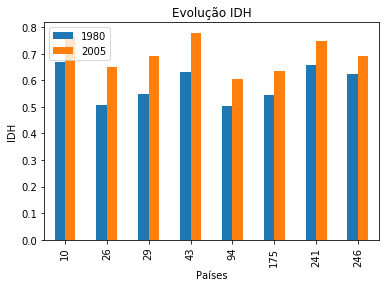

10:Argentina; 26:Bolívia; 29:Brasil; 43:Chile ; 94:Guiana; 175:Paraguai 241:Uruguai; 246:Venezuela


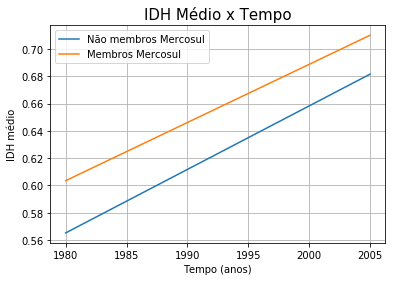

A média do IDH dos países não membros do Mercosul em 1980 era:  0.56525
A média do IDH dos países não membros do Mercosul em 2005 evoluiu  para:  0.6815
O crescimento médio do IDH dos países não membros do Mercosul  de 1980 a 2005 foi de:  20.566121185316224 %
 
A média do IDH dos países membros do Mercosul em 1980 era:  0.56525
A média do IDH dos países membros do Mercosul em 2005 evoluiu  para:  0.6815
O crescimento médio do IDH dos países membros do Mercosul  de 1980 a 2005 foi de:  17.6470588235294 %


In [279]:
anos = [1980,2005]
dados1 = [mediaIDH1980r,mediaIDH2005r]
dados2 = [mediaIDH1980m, mediaIDH2005m]

IDH_T.plot(kind="bar")
plt.xlabel('Países')
plt.ylabel('IDH')
plt.title('Evolução IDH')
plt.legend()
plt.show()

print('10:Argentina; 26:Bolívia; 29:Brasil; 43:Chile ; 94:Guiana; 175:Paraguai 241:Uruguai; 246:Venezuela')


plt.plot(anos, dados1, label = "Não membros Mercosul")
plt.plot(anos,dados2, label = "Membros Mercosul")
plt.xlabel('Tempo (anos)')
plt.ylabel('IDH médio')
plt.title('IDH Médio x Tempo', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()

print('A média do IDH dos países não membros do Mercosul em 1980 era: ', mediaIDH1980r)
print('A média do IDH dos países não membros do Mercosul em 2005 evoluiu  para: ', mediaIDH2005r)
print('O crescimento médio do IDH dos países não membros do Mercosul  de 1980 a 2005 foi de: ', ((mediaIDH2005r-mediaIDH1980r)/mediaIDH1980r)*100, "%")
print(' ')
print('A média do IDH dos países membros do Mercosul em 1980 era: ', mediaIDH1980r)
print('A média do IDH dos países membros do Mercosul em 2005 evoluiu  para: ', mediaIDH2005r)
print('O crescimento médio do IDH dos países membros do Mercosul  de 1980 a 2005 foi de: ', ((mediaIDH2005m-mediaIDH1980m)/mediaIDH1980m)*100, "%")


Como todos os países analisados acima fazem parte do Mercosul (alguns membros e outros associados), e a diferença entre um país membro e um país associado é a adesão a uma tarifa externa comum, não faz sentido comparar o crescimento do IDH entre países associados e países membros, pois os projetos que influenciam diretamente o IDH (como projetos de melhoria de infraestrutura, educação e saneamento básico) são aderidos por todas as nações que fazem parte do bloco. 
Sabendo disso, vou selecionar 8 países da américa central e comparar com os 8 países (membros e associados ao Mercosul) para obter uma anáise macroeconômica a respeito desse indicador. 

In [191]:
mediaMT1980 = IDH_T[1980].mean()
medianaMT1980 = IDH_T[1980].median()

mediaMT2005 = IDH_T[2005].mean()
medianaMT2005 = IDH_T[2005].median()

print('A mediana do IDH dos países do Mercosul em 1980 é: ',medianaMT1980)
print('A média do IDH dos países do Mercosul em 1980 é: ', mediaMT1980)
print(' ')
print('A mediana do IDH dos países do Mercosul em 2005 é: ',medianaMT2005)
print('A media do IDH dos países do Mercosul em 2005 é: ',mediaMT2005)

A mediana do IDH dos países do Mercosul em 1980 é:  0.5860000000000001
A média do IDH dos países do Mercosul em 1980 é:  0.585125
 
A mediana do IDH dos países do Mercosul em 2005 é:  0.692
A media do IDH dos países do Mercosul em 2005 é:  0.69575


A partir desses dados pode-se observar que a média  do IDH dos países do Mercosul é muito próxima a mediana, portanto a média é um bom parâmetro para resumir os dados.

In [192]:
#Ver a media e mediana dos paises da america central
mediaam1980 = acIDH[1980].mean()
medianaam1980 = acIDH[1980].median()

mediaam2005 = acIDH[2005].mean()
medianaam2005 = acIDH[2005].mean()

print('A mediana do IDH dos países da América Central em 1980 é: ',medianaam1980)
print('A média do IDH dos países da América Central em 1980 é: ', mediaam1980)
print(' ')
print('A mediana do IDH dos países da América Central em 2005 é: ',medianaam2005)
print('A media do IDH dos países da América Central em 2005 é: ',mediaam2005)

A mediana do IDH dos países da América Central em 1980 é:  0.5365
A média do IDH dos países da América Central em 1980 é:  0.5181250000000001
 
A mediana do IDH dos países da América Central em 2005 é:  0.63525
A media do IDH dos países da América Central em 2005 é:  0.63525


A partir desses dados pode-se observar que a média  do IDH dos países da América Central é muito próxima a mediana, portanto a média é um bom parâmetro para resumir os dados.

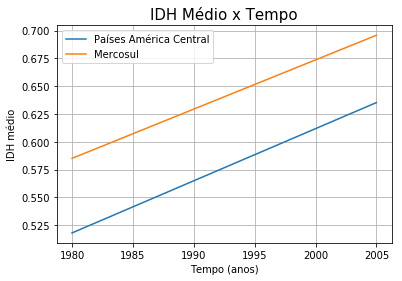

A média do IDH dos países do Mercosul em 1980 era:  0.585125
A média do IDH dos países do Mercosul em 2005 evoluiu  para:  0.69575
O crescimento médio do IDH dos países do Mercosul de 1980 a 2005 foi de:  15.900107797341 %
 
A média do IDH dos países da América Central em 1980 era:  0.5181250000000001
A média do IDH dos países da América Central em 2005 evoluiu  para:  0.63525
O crescimento médio do IDH dos países da América Central de 1980 a 2005 foi de:  18.437622983077517 %


In [253]:
#grafico paises america central vs paises mercosul
dadosam = [mediaam1980,mediaam2005]
dadosMT = [mediaMT1980, mediaMT2005]

plt.plot(anos, dadosam, label = "Países América Central")
plt.plot(anos,dadosMT, label = "Mercosul")
plt.xlabel('Tempo (anos)')
plt.ylabel('IDH médio')
plt.title('IDH Médio x Tempo', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()

print('A média do IDH dos países do Mercosul em 1980 era: ', mediaMT1980)
print('A média do IDH dos países do Mercosul em 2005 evoluiu  para: ', mediaMT2005)
print('O crescimento médio do IDH dos países do Mercosul de 1980 a 2005 foi de: ', ((mediaMT2005-mediaMT1980)/mediaMT1980)*100, "%")
print(' ')
print('A média do IDH dos países da América Central em 1980 era: ', mediaam1980)
print('A média do IDH dos países da América Central em 2005 evoluiu  para: ', mediaam2005)
print('O crescimento médio do IDH dos países da América Central de 1980 a 2005 foi de: ', ((mediaam2005-mediam1980)/mediaam1980)*100, "%")


Analisando o crescimento relacionado ao IDH, o Mercosul nao obteve sucesso em seus projetos sociais que tinham como objetivo melhorar a condição de vida dos habitantes, ou os países da América Central investiram uma quantia maior de capital em projetos sociais destinados a melhoria das condições de vida. Isso pode ser concluido com base no resultado do aumento médio do IDH dos países da América Central, que foi maior em porcentagem do que o aumnento médio no IDH das nações que fazem parte do Mercosul. Esse dado nos demonstra que o grupo de países pertencentes a união (que tem como um de seus objetivos a melhoria do IDH) não superou o crescimento médio em porcentagem do IDH de países que não pertencem a uma união. 

In [ ]:
# Analisando a balança comercial

In [194]:
medianaTB1980m = TB_M['1980'].mean()
mediaTB1980m = TB_M['1980'].median()
mediaTB2005m = TB_M['2005'].mean()
medianaTB2005m = TB_M['2005'].median()


print('A mediana da balança comercial dos países membros do Mercosul em 1980 é: ',medianaTB1980m)
print('A média da balança comercial dos países membros do Mercosul em 1980 é: ', mediaTB1980m)
print(' ')
print('A mediana da balança comercial dos países membros do Mercosul em 2005 é: ',medianaTB2005m)
print('A media da balança comercial dos países membros do Mercosul em 2005 é: ',mediaTB2005m)


A mediana da balança comercial dos países membros do Mercosul em 1980 é:  -1892944958.3608737
A média da balança comercial dos países membros do Mercosul em 1980 é:  -853733175.710253
 
A mediana da balança comercial dos países membros do Mercosul em 2005 é:  5552746388.763463
A media da balança comercial dos países membros do Mercosul em 2005 é:  10651974515.122053


In [195]:
medianaTB1980r = TB_R['1980'].mean()
mediaTB1980r = TB_R['1980'].median()
mediaTB2005r = TB_R['2005'].mean()
medianaTB2005r = TB_R['2005'].median()

print('A mediana da balança comercial dos países não membros do Mercosul em 1980 é: ',medianaTB1980r)
print('A média da balança comercial dos países não membros do Mercosul em 1980 é: ', mediaTB1980r)
print(' ')
print('A mediana da balança comercial dos países não membros do Mercosul em 2005 é: ',medianaTB2005r)
print('A media da balança comercial dos países não membros do Mercosul em 2005 é: ',mediaTB2005r)


A mediana da balança comercial dos países não membros do Mercosul em 1980 é:  886824000.1644285
A média da balança comercial dos países não membros do Mercosul em 1980 é:  13605979.850367002
 
A mediana da balança comercial dos países não membros do Mercosul em 2005 é:  5199038298.5506315
A media da balança comercial dos países não membros do Mercosul em 2005 é:  9509201531.061295


Como pode-se observar, a média neste caso não é uma boa maneira de resumir os dados referentes a balança comercial dos países da América do Sul. Com isso, o parâmetro escolhido para resumir os dados foi a mediana.  


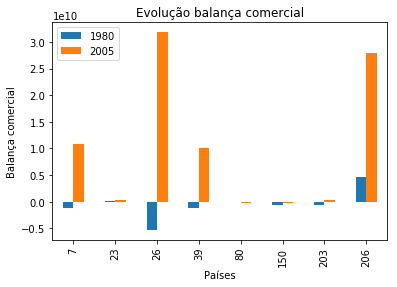

7:Argentina; 23:Bolívia; 26:Brasil; 39:Chile ; 80:Guiana; 150:Paraguai 203:Uruguai; 206:Venezuela


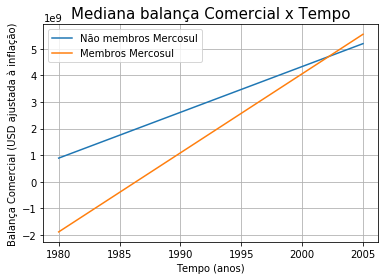

A mediana da balança comercial dos países não membros do Mercosul em 1980 era:  886824000.1644285
A mediana da balança comercial dos países não membros do Mercosul em 2005 evoluiu  para:  5199038298.5506315
 
A mediana da balança comercial dos países membros do Mercosul em 1980 era:  -1892944958.3608737
A mediana da balança comercial dos países membros do Mercosul em 2005 evoluiu  para:  5552746388.763463


In [282]:
dadostbm = [medianaTB1980m,medianaTB2005m]
dadostbr = [medianaTB1980r,medianaTB2005r]

TB_T.plot(kind="bar")
plt.xlabel('Países')
plt.ylabel('Balança comercial')
plt.title('Evolução balança comercial')
plt.legend()
plt.show()

print('7:Argentina; 23:Bolívia; 26:Brasil; 39:Chile ; 80:Guiana; 150:Paraguai 203:Uruguai; 206:Venezuela')


plt.plot(anos, dadostbr, label = "Não membros Mercosul")
plt.plot(anos,dadostbm, label = "Membros Mercosul")
plt.xlabel('Tempo (anos)')
plt.ylabel('Balança Comercial (USD ajustada à inflação)')
plt.title('Mediana balança Comercial x Tempo', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()

print('A mediana da balança comercial dos países não membros do Mercosul em 1980 era: ', medianaTB1980r)
print('A mediana da balança comercial dos países não membros do Mercosul em 2005 evoluiu  para: ', medianaTB2005r)
print(" ")
print('A mediana da balança comercial dos países membros do Mercosul em 1980 era: ', medianaTB1980m)
print('A mediana da balança comercial dos países membros do Mercosul em 2005 evoluiu  para: ', medianaTB2005m)


A partir da análise dos dados acima, pode-se concluir que a formação do Mercosul causou um crescimento considerável na balança comercial dos países membros. Esse crescimento pode ser diretamente relacionado com a TEC, que define uma tarifa única para a importação de produtos externos. Isso estimula o comércio entre os países que fazem parte do bloco econômico, pois a TEC do Mercosul é extremamente baixa comparada com a taxa de importação de países que não sao membros da união. Pode-se concluir que o Mercosul teve sucesso em um de seus objetivos principais: desenvolver os membros da união enconomicamente, por meio do estímulo do comércio entre as nações. 

In [ ]:
#Analisando o PIB per capita

In [197]:
medianaGDP1980r = GDP_R['1980'].mean()
mediaGDP1980r = GDP_R['1980'].median()
mediaGDP2005r = GDP_R['2005'].mean()
medianaGDP2005r = GDP_R['2005'].median()

print('A mediana do PIB per capita dos países não membros do Mercosul em 1980 é: ',medianaGDP1980r)
print('A média do PIB per capita dos países não membros do Mercosul em 1980 é: ', mediaGDP1980r)
print(' ')
print('A mediana do PIB per capita dos países não membros do Mercosul em 2005 é: ',medianaGDP2005r)
print('A media do PIB per capita dos países não membros do Mercosul em 2005 é: ',mediaGDP2005r)


A mediana do PIB per capita dos países não membros do Mercosul em 1980 é:  2553.8665183792127
A média do PIB per capita dos países não membros do Mercosul em 1980 é:  1785.634525572285
 
A mediana do PIB per capita dos países não membros do Mercosul em 2005 é:  3034.547267416155
A media do PIB per capita dos países não membros do Mercosul em 2005 é:  3259.360758417857


In [198]:
medianaGDP1980m = GDP_M['1980'].mean()
mediaGDP1980m = GDP_M['1980'].median()
mediaGDP2005m = GDP_M['2005'].mean()
medianaGDP2005m = GDP_M['2005'].median()

print('A mediana do PIB per capita dos países membros do Mercosul em 1980 é: ',medianaGDP1980m)
print('A média do PIB per capita dos países membros do Mercosul em 1980 é: ', mediaGDP1980m)
print(' ')
print('A mediana do PIB per capita dos países membros do Mercosul em 2005 é: ',medianaGDP2005m)
print('A media do PIB per capita dos países membros do Mercosul em 2005 é: ',mediaGDP2005m)


A mediana do PIB per capita dos países membros do Mercosul em 1980 é:  4526.766482532333
A média do PIB per capita dos países membros do Mercosul em 1980 é:  4577.44697485151
 
A mediana do PIB per capita dos países membros do Mercosul em 2005 é:  5472.045221480835
A media do PIB per capita dos países membros do Mercosul em 2005 é:  5095.793222412407


Como pode-se observar, a média do PIB por capita dos países da América do Sul não é o melhor parâmetro para resumir os dados, com isso, vamos utilizar a mediana para fazer esse papel.

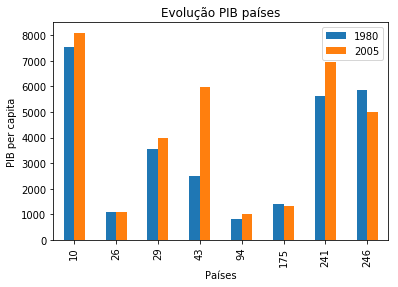

10:Argentina; 26:Bolívia; 29:Brasil; 43:Chile ; 94:Guiana; 175:Paraguai 241:Uruguai; 246:Venezuela


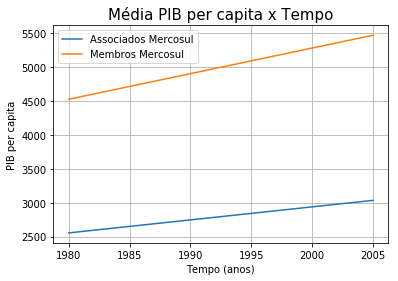

A mediana do PIB per capita dos países não membros do Mercosul em 1980 era:  2553.8665183792127
A mediana do PIB per capita dos países não membros do Mercosul em 2005 evoluiu  para:  3034.547267416155
O crescimento da balança comercial dos países não membros do Mercosul  de 1980 a 2005 foi de:  18.821686473340115 %
 
A mediana do PIB per capita dos países membros do Mercosul em 1980 era:  2553.8665183792127
A mediana do PIB per capita dos países membros do Mercosul em 2005 evoluiu  para:  3034.547267416155
O crescimento do PIB per capita dos países membros do Mercosul  de 1980 a 2005 foi de:  20.88198590751473 %


In [283]:
dadosgdpr = [medianaGDP1980r, medianaGDP2005r]
dadosgdpm = [medianaGDP1980m, medianaGDP2005m]


GDP_T.plot(kind="bar")
plt.xlabel('Países')
plt.ylabel('PIB per capita')
plt.title('Evolução PIB países')
plt.legend()
plt.show()

print('10:Argentina; 26:Bolívia; 29:Brasil; 43:Chile ; 94:Guiana; 175:Paraguai 241:Uruguai; 246:Venezuela')


plt.plot(anos, dadosgdpr, label = "Associados Mercosul")
plt.plot(anos,dadosgdpm, label = "Membros Mercosul")
plt.xlabel('Tempo (anos)')
plt.ylabel('PIB per capita')
plt.title('Média PIB per capita x Tempo', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()


print('A mediana do PIB per capita dos países não membros do Mercosul em 1980 era: ', medianaGDP1980r)
print('A mediana do PIB per capita dos países não membros do Mercosul em 2005 evoluiu  para: ', medianaGDP2005r)
print('O crescimento da balança comercial dos países não membros do Mercosul  de 1980 a 2005 foi de: ', (((medianaGDP2005r-medianaGDP1980r)/medianaGDP1980r))*100, "%")
print(' ')
print('A mediana do PIB per capita dos países membros do Mercosul em 1980 era: ', medianaGDP1980r)
print('A mediana do PIB per capita dos países membros do Mercosul em 2005 evoluiu  para: ', medianaGDP2005r)
print('O crescimento do PIB per capita dos países membros do Mercosul  de 1980 a 2005 foi de: ', (((medianaGDP2005m-medianaGDP1980m)/medianaGDP1980m))*100, "%")


Pode-se notar uma diferença sutil entre a evolução do PIB per capita entre os membros do Mercosul vs não membros (aproximadamente 2% a mais de crescimento aos membros). Pode-se inferir que o maior crecimento percentual do PIB dos países membros ao serem comparados aos países associados é reflexo do aumento significativo na balança comercial dos países membros (pois o comércio compõe uma grande parcela do PIB da maioria das nações).

## Conclusão

Após a análise entre países membros do Mercosul vs países associados (comparando seus PIBs per capita e suas balanças comerciais), pode-se concluir que a união aduaneira obteve sucesso em seu objetivo principal, que é estimular o comércio entre os países membros por meio da diminuição de impostos sobre a importação/exportação de produtos. Tal estímulo teve um resultado significativo na balança comercial dos países membros, com isso pode-se notar que esse resultado influenciou diretamente o crescimento do PIB per capita das nações, já que o comércio compõe uma grande parcela do PIB dos países da América do Sul. 
Em relação a análise do IDH, como os projetos sociais do Mercosul abrangem não somente os países membros mas também os países associados, foram coletados dados de países da América Central (já que todos os países da América do Sul fazem parte do Mercosul com uma exceção) para serem comparados aos países membros e associados ao Mercosul. A partir dos dados obtidos nessa análise, podemos retirar duas possíveis teorias: os projetos sociais promovidos pelo Mercosul não foram bem sucedidos; ou os países da América Central investiram uma maior porcentagem de seu capital em reformas sociais que promovem a melhoria de vida. 
A respeito do Mercosul como organização, pode-se concluir que países que aderem a esta união (como membros) estão sujeitos a um aumento significativo de sua balança comercial, seguido por um aumento modesto em seu PIB; mas não estão sujeitos a um crescimento acima da média no que se refere a questões sociais (como IDH). 